In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("dark") # Theme for plots as Dark
print("Setup Complete")

/kaggle/input/carpriceprediction/data.csv
Setup Complete


# **Learning and Practising EDA on Car Price Dataset**
Target Variable: MSRP/Price

In [2]:
df = pd.read_csv("../input/carpriceprediction/data.csv")
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


Target Variable: MSRP/Price

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [4]:
df.drop(["Engine Fuel Type"],inplace = True,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine HP          11845 non-null  float64
 4   Engine Cylinders   11884 non-null  float64
 5   Transmission Type  11914 non-null  object 
 6   Driven_Wheels      11914 non-null  object 
 7   Number of Doors    11908 non-null  float64
 8   Market Category    8172 non-null   object 
 9   Vehicle Size       11914 non-null  object 
 10  Vehicle Style      11914 non-null  object 
 11  highway MPG        11914 non-null  int64  
 12  city mpg           11914 non-null  int64  
 13  Popularity         11914 non-null  int64  
 14  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 1.4+ MB


In [5]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders',
       'Transmission Type', 'Driven_Wheels', 'Number of Doors',
       'Market Category', 'Vehicle Size', 'Vehicle Style', 'highway MPG',
       'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [6]:
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Market Category,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [7]:
dup_df = df[df.duplicated()]
dup_df.shape

(715, 15)

In [8]:
df.drop_duplicates(inplace = True)

In [9]:
df.shape

(11199, 15)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11199 entries, 0 to 11913
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Make             11199 non-null  object 
 1   Model            11199 non-null  object 
 2   Year             11199 non-null  int64  
 3   HP               11130 non-null  float64
 4   Cylinders        11169 non-null  float64
 5   Transmission     11199 non-null  object 
 6   Drive Mode       11199 non-null  object 
 7   Number of Doors  11193 non-null  float64
 8   Market Category  7823 non-null   object 
 9   Vehicle Size     11199 non-null  object 
 10  Vehicle Style    11199 non-null  object 
 11  MPG-H            11199 non-null  int64  
 12  MPG-C            11199 non-null  int64  
 13  Popularity       11199 non-null  int64  
 14  Price            11199 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 1.4+ MB


# Removing Null Values

In [11]:
df.isnull().sum()

Make                  0
Model                 0
Year                  0
HP                   69
Cylinders            30
Transmission          0
Drive Mode            0
Number of Doors       6
Market Category    3376
Vehicle Size          0
Vehicle Style         0
MPG-H                 0
MPG-C                 0
Popularity            0
Price                 0
dtype: int64

In [12]:
df.dropna(inplace =True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7735 entries, 0 to 11913
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Make             7735 non-null   object 
 1   Model            7735 non-null   object 
 2   Year             7735 non-null   int64  
 3   HP               7735 non-null   float64
 4   Cylinders        7735 non-null   float64
 5   Transmission     7735 non-null   object 
 6   Drive Mode       7735 non-null   object 
 7   Number of Doors  7735 non-null   float64
 8   Market Category  7735 non-null   object 
 9   Vehicle Size     7735 non-null   object 
 10  Vehicle Style    7735 non-null   object 
 11  MPG-H            7735 non-null   int64  
 12  MPG-C            7735 non-null   int64  
 13  Popularity       7735 non-null   int64  
 14  Price            7735 non-null   int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 966.9+ KB


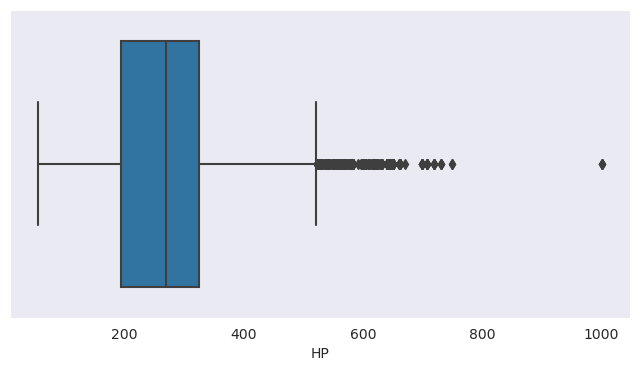

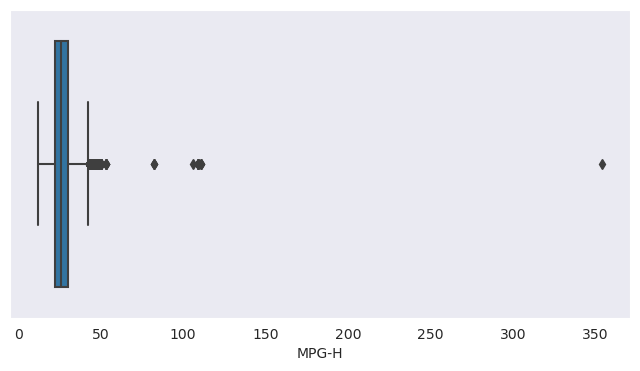

In [14]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['HP'])
plt.show()
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['MPG-H']);

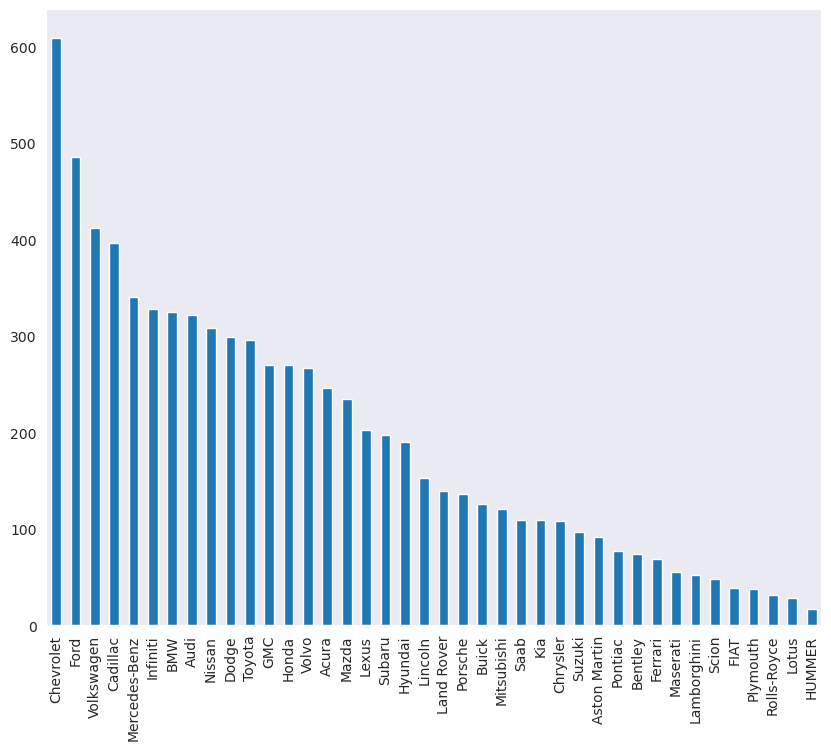

In [15]:
df.Make.value_counts().nlargest(40).plot(kind='bar',figsize=(10,8));

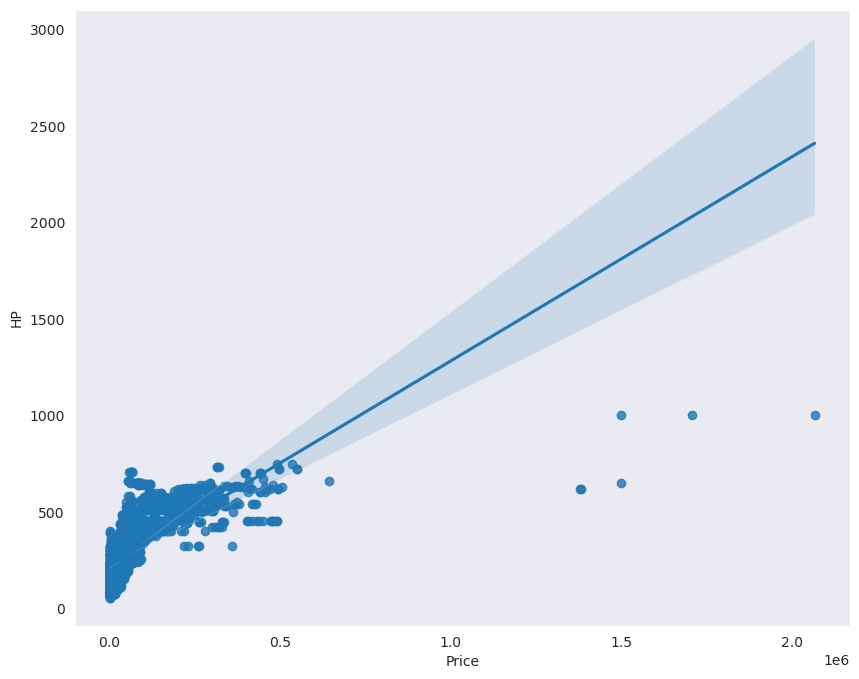

In [16]:
plt.figure(figsize=(10,8))
sns.regplot(x=df["Price"],y=df["HP"]);

/tmp/ipykernel_20/100862501.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c= df.corr()


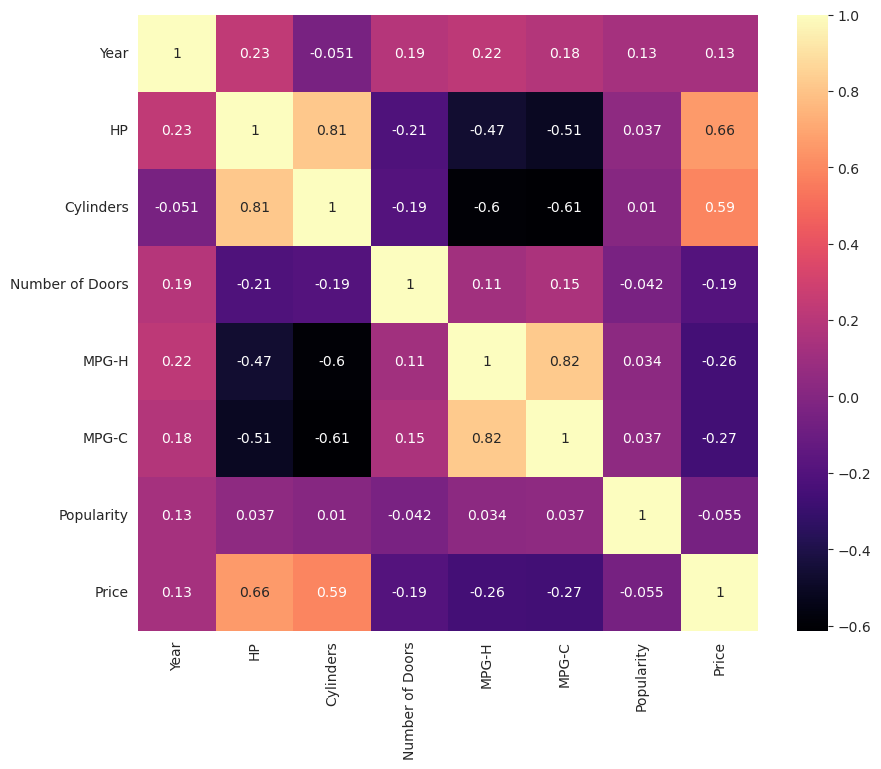

In [17]:
plt.figure(figsize=(10,8))
c= df.corr()
sns.heatmap(c,cmap = 'magma', annot=True);